## SPAM Text Message with NLP

In [2]:
#Import library yang dibutuhkan
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set_style("whitegrid")
sns.set(style="darkgrid")
sns.set_palette("tab10")

In [3]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


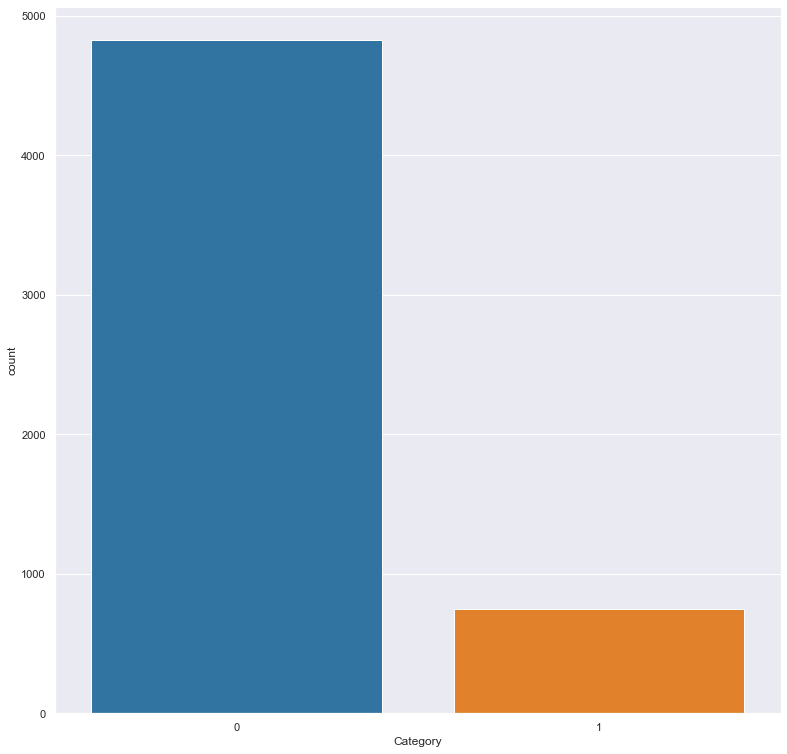

In [31]:
sns.countplot(df["Category"])

In [5]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
def text_cleanser(text):
    stemmer = WordNetLemmatizer()
    text = ''.join([char for char in text if (char.isalpha() or char.isspace()) and char !="'"])
    text = [word.lower() for word in text.split() if word.lower() not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in text]
sample_text = "Hello! This is me. I need to verify whether this sentence is working correctly."
print(text_cleanser(sample_text))

['hello', 'need', 'verify', 'whether', 'sentence', 'working', 'correctly']


In [7]:
df_desc = df[['Category', 'Message']].set_index('Category')
df_desc['turn_message'] = df_desc['Message'].apply(lambda x : text_cleanser(x))

In [8]:
df_desc

,Message,turn_message
Category,,
ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"
...,...,...
spam,This is the 2nd time we have tried 2 contact u...,"[nd, time, tried, contact, u, u, pound, prize,..."
ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]"
ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestion]"


In [10]:
vocabulary = {}
for words in df_desc.turn_message :
    for word in words :
        if word in vocabulary :
            vocabulary[word] = vocabulary[word]+1
        else:
            vocabulary[word] = 0

df_voc = pd.DataFrame(list(vocabulary.items()), columns=['text', 'count'])

In [11]:
df_voc

,text,count
0,go,310
1,jurong,0
2,point,32
3,crazy,14
4,available,15
...,...,...
7972,lowes,0
7973,salesman,0
7974,pity,0
7975,soany,0


In [12]:
from wordcloud import WordCloud, STOPWORDS

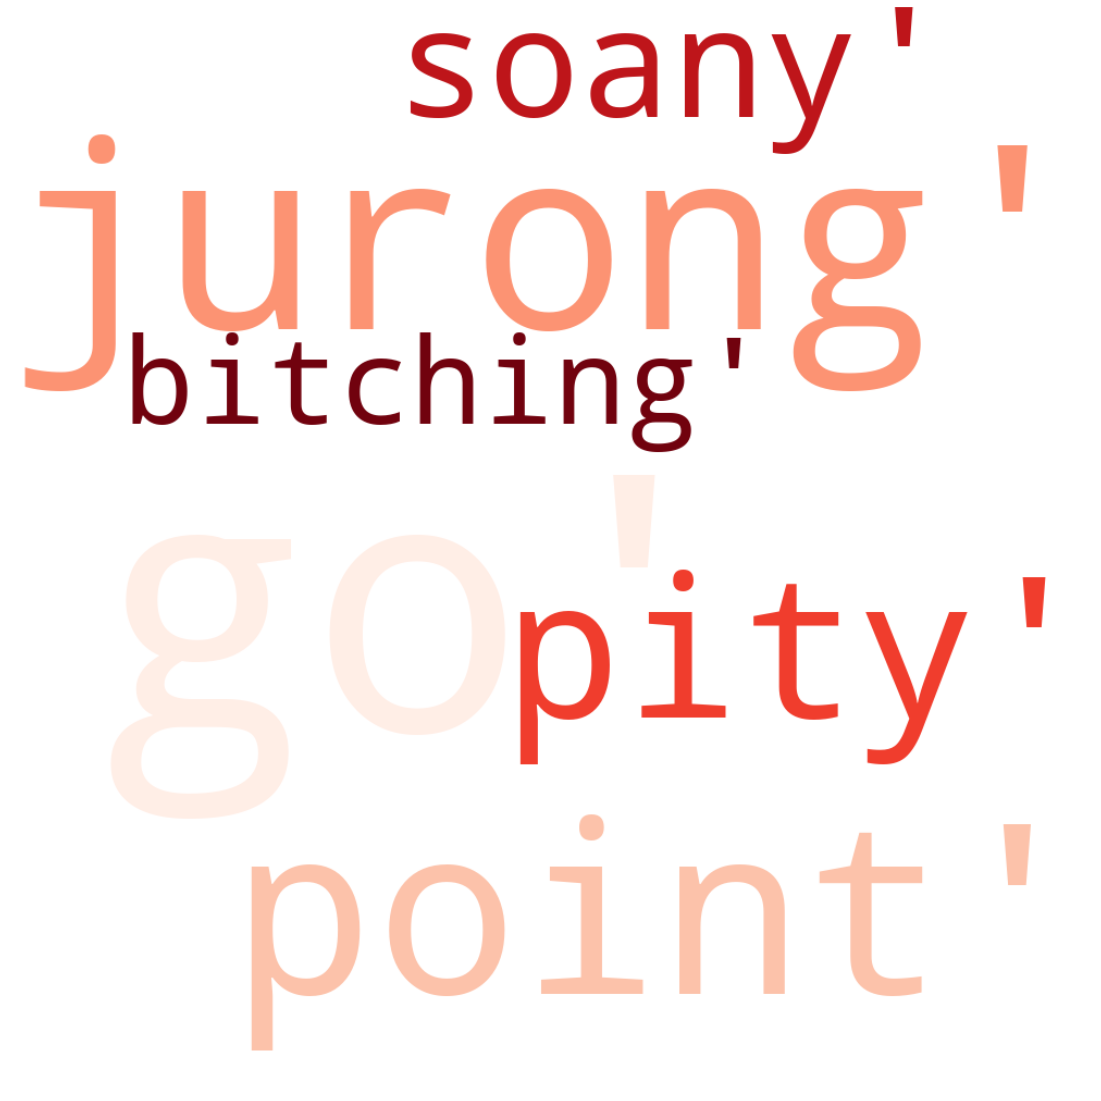

In [13]:
text = df_voc.text.values
plt.rcParams['figure.figsize'] = (13,13)

word_cloud=WordCloud(colormap='Reds', width=1000, height=1000,mode='RGBA',background_color='white').generate(str(text))

plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

## Data Processing

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Category"]=le.fit_transform(df["Category"])

In [15]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
y = df['Category']

In [17]:
df_desc

,Message,turn_message
Category,,
ham,"Go until jurong point, crazy.. Available only ...","[go, jurong, point, crazy, available, bugis, n..."
ham,Ok lar... Joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
ham,U dun say so early hor... U c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
ham,"Nah I don't think he goes to usf, he lives aro...","[nah, dont, think, go, usf, life, around, though]"
...,...,...
spam,This is the 2nd time we have tried 2 contact u...,"[nd, time, tried, contact, u, u, pound, prize,..."
ham,Will ü b going to esplanade fr home?,"[ü, b, going, esplanade, fr, home]"
ham,"Pity, * was in mood for that. So...any other s...","[pity, mood, soany, suggestion]"


In [42]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(df['Message']).toarray()

In [43]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Train Test Split

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [46]:
from sklearn.metrics import  accuracy_score , confusion_matrix , plot_confusion_matrix ,  classification_report

## Support Vector Classifier

SVC model accuracy :98.12%


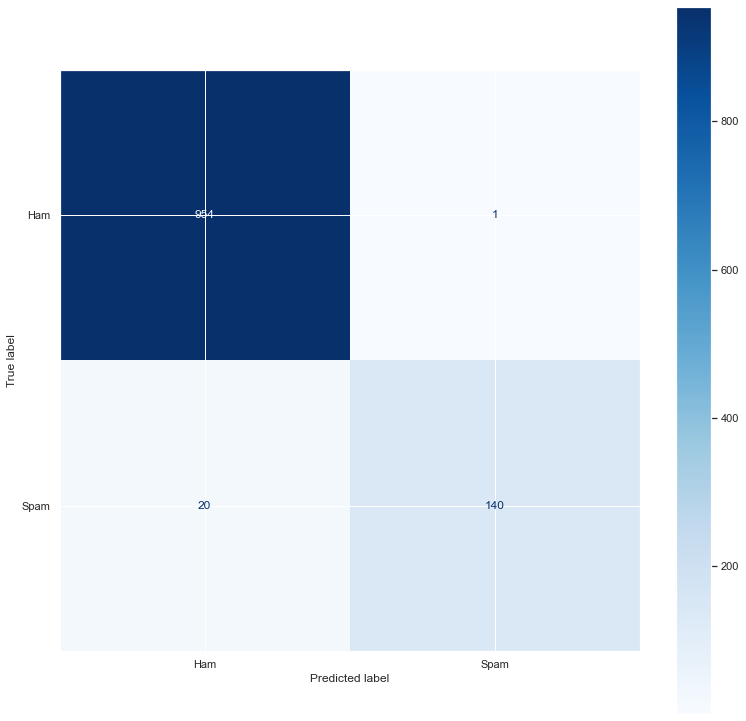

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       955
        Spam       0.99      0.88      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [47]:
from sklearn.svm import SVC
SVC_classifier = SVC().fit(X_train , y_train)
SVC_classifier_prediction = SVC_classifier.predict(X_test)
SVC_Acc = accuracy_score(y_test , SVC_classifier_prediction)*100
print(f"SVC model accuracy :{format(SVC_Acc ,'.2f')}%")

cm  = confusion_matrix(y_test , SVC_classifier_prediction)

disp = plot_confusion_matrix(SVC_classifier, X_test, y_test,
                             display_labels=["Ham" , "Spam"],
                             cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test ,SVC_classifier_prediction  , target_names = ["Ham" ,"Spam"]))

## KNeighbors Classifier 

K-NEATEST NEIGHBOR model accuracy : 93.36%


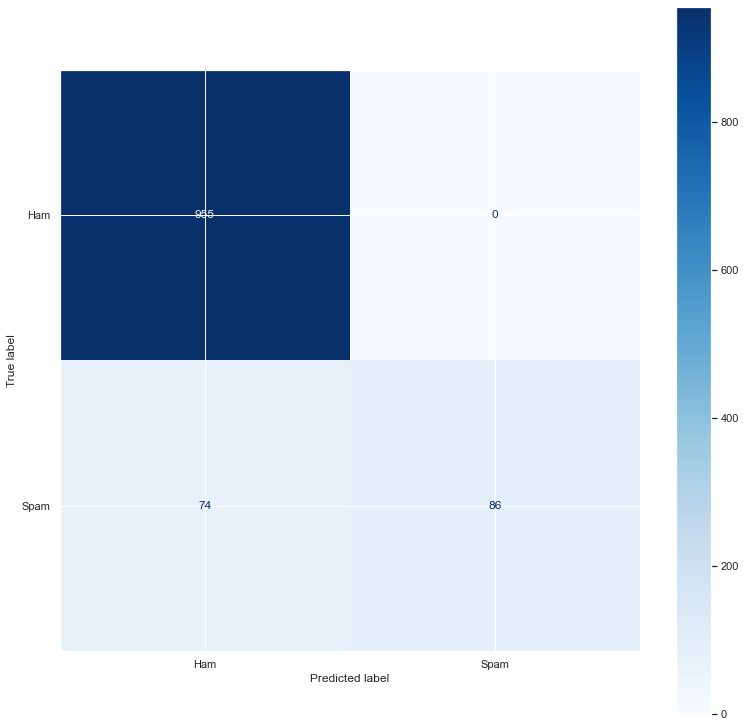

              precision    recall  f1-score   support

         Ham       0.93      1.00      0.96       955
        Spam       1.00      0.54      0.70       160

    accuracy                           0.93      1115
   macro avg       0.96      0.77      0.83      1115
weighted avg       0.94      0.93      0.92      1115



In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN_CLASSIFICATION = KNeighborsClassifier(n_neighbors=3)
KNN_CLASSIFICATION.fit(X_train  , y_train)
KNN_CLASSIFICATION_Prediction= KNN_CLASSIFICATION.predict(X_test)
KNN_Acc = accuracy_score(y_test , KNN_CLASSIFICATION_Prediction)*100 
print(f"K-NEATEST NEIGHBOR model accuracy : {format(KNN_Acc , '.2f')}%")

cm  = confusion_matrix(y_test , KNN_CLASSIFICATION_Prediction)

disp = plot_confusion_matrix(KNN_CLASSIFICATION, X_test, y_test,
                             display_labels=["Ham" , "Spam"],
                             cmap=plt.cm.Blues)

plt.show()

print(classification_report(y_test ,KNN_CLASSIFICATION_Prediction  , target_names = ["Ham" ,"Spam"]))

## Naive Bayes

NAIVE BAYES model accuracy : 97.94%


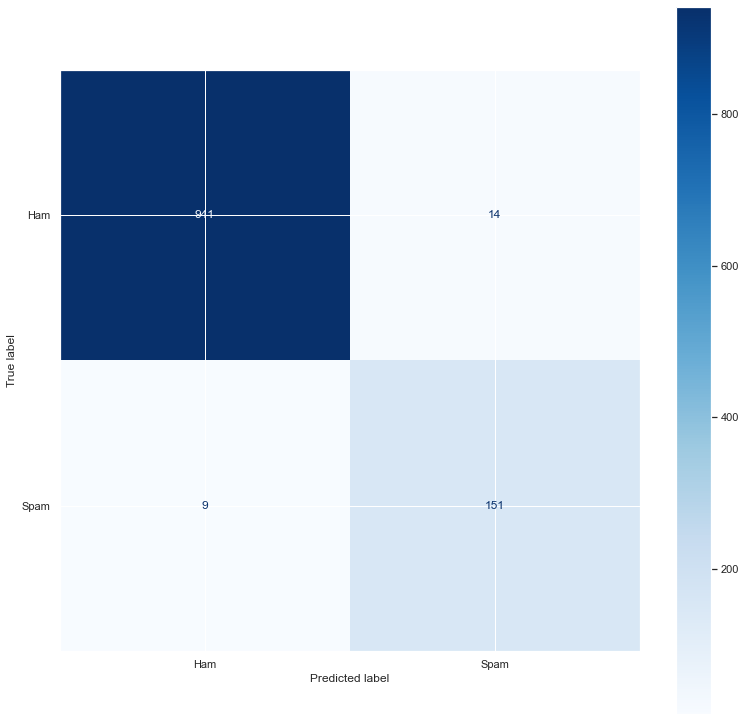

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       955
        Spam       0.92      0.94      0.93       160

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [52]:
from sklearn.naive_bayes import MultinomialNB
NB_Classification = MultinomialNB().fit(X_train , y_train)
NB_Classification_Prediction = NB_Classification.predict(X_test)
NB_Acc = accuracy_score(y_test , NB_Classification_Prediction)*100 
print(f"NAIVE BAYES model accuracy : {format(NB_Acc, '.2f')}%")

cm  = confusion_matrix(y_test , NB_Classification_Prediction)

disp = plot_confusion_matrix(NB_Classification, X_test, y_test,
                             display_labels=["Ham" , "Spam"],
                             cmap=plt.cm.Blues)
plt.show()

print(classification_report(y_test ,NB_Classification_Prediction  , target_names = ["Ham" ,"Spam"]))

## Logistic Regression

LOGISITC REGRESSION model accuracy : 98.57 %


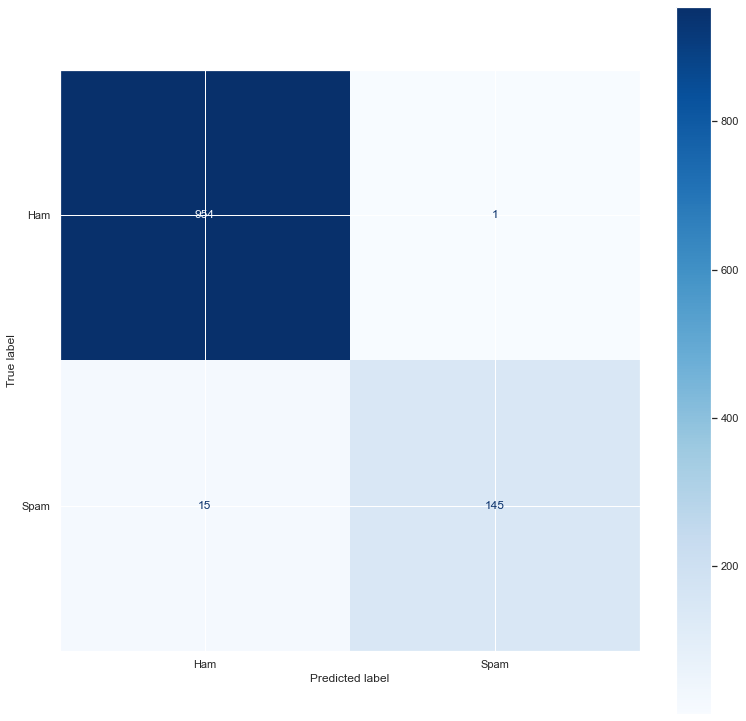

              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       955
        Spam       0.99      0.91      0.95       160

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [53]:
from sklearn.linear_model import LogisticRegressionCV

LR_Classification = LogisticRegressionCV().fit(X_train , y_train)

LR_Classification_Prediction = LR_Classification.predict(X_test)

LR_Acc = accuracy_score(y_test ,LR_Classification_Prediction)*100 

print(f"LOGISITC REGRESSION model accuracy : {format(LR_Acc, '.2f')} %")

cm = confusion_matrix(y_test , LR_Classification_Prediction)

dict = plot_confusion_matrix(LR_Classification, X_test , y_test , display_labels = ["Ham" , "Spam"] , cmap = plt.cm.Blues)
plt.show()

print(classification_report(y_test ,LR_Classification_Prediction  , target_names = ["Ham" ,"Spam"]))

## Summary Report

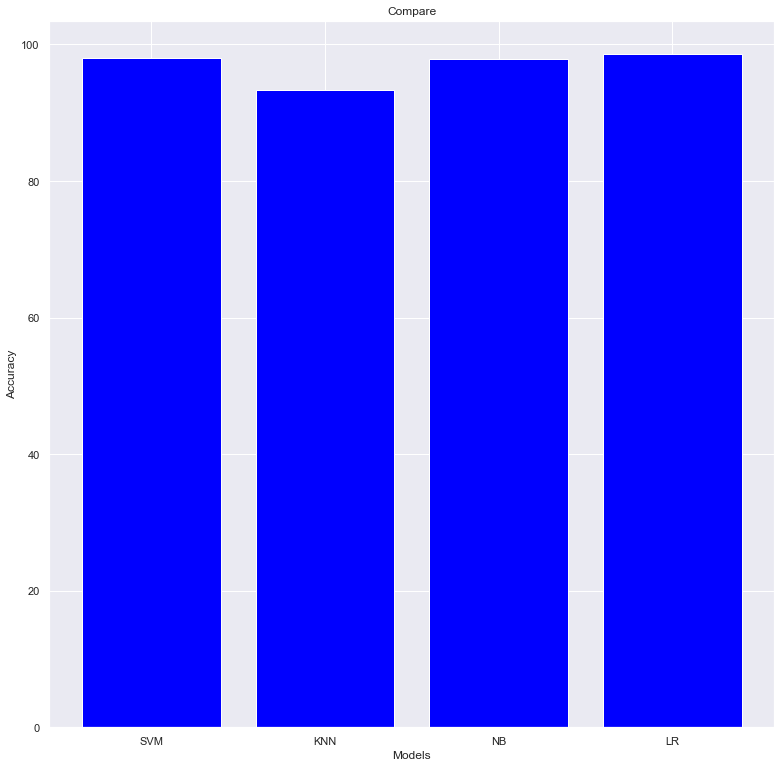

In [54]:
models = ['SVM','KNN','NB','LR']  
acc = [SVC_Acc,KNN_Acc,NB_Acc,LR_Acc]  
plt.bar(models,acc,color = 'blue')  
plt.title('Compare')  
plt.xlabel('Models')  
plt.ylabel('Accuracy')  
plt.show() 